## I've done this model as part of the course: Applied Machine Learning in Python, made by University of Michigan.

## Let's start importing the libraries needed and the dataset we will use

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_breast_cancer

## We load the dataset breast_cancer from sklearn.datasets

In [2]:
cancer = load_breast_cancer()

print('\033[1m' + 'Here the information we can acces on this dataset: \n' + '\033[0m' + str(cancer.keys()) + '\n\n')

Here the information we can acces on this dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])




## We visualise the decription information

In [3]:
print('\033[1m' +'Here the description of the dataset: \n' + '\033[0m' + str(cancer.DESCR))

Here the description of the dataset: 
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 feature

## We show the feature names

In [4]:
print('\033[1m' + 'Here the feature names: \n' + '\033[0m' + str(cancer.feature_names) + '\n\n')

Here the feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']




## We load the dataset into a DataFrame, setting the column 'target' as the target and the other columns as the inputs to our classification model.


In [5]:
data = cancer.data
columns = cancer.feature_names
df = pd.DataFrame(data = data, columns = columns)
df['target'] = cancer.target
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## We will check the possible output and verify the proportion of possitives and negatives

In [6]:
values, counts = np.unique(cancer.target, return_counts=True)
target = pd.Series(counts, name= "target", index=['malignant', 'benign'])

print(target)

malignant    212
benign       357
Name: target, dtype: int64


## We will separate the features from the output:

In [7]:
X = df.iloc[:, 0:30]
y = df['target']

## We will split train and test subsets.  We’ll set aside 25% of the observations for testing.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
print(X_train, X_test, y_train, y_test)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
293       11.850         17.46           75.54      432.7          0.08372   
332       11.220         19.86           71.94      387.3          0.10540   
565       20.130         28.25          131.20     1261.0          0.09780   
278       13.590         17.84           86.24      572.3          0.07948   
489       16.690         20.20          107.10      857.6          0.07497   
..           ...           ...             ...        ...              ...   
277       18.810         19.98          120.90     1102.0          0.08923   
9         12.460         24.04           83.97      475.9          0.11860   
359        9.436         18.32           59.82      278.6          0.10090   
192        9.720         18.22           60.73      288.1          0.06950   
559       11.510         23.93           74.52      403.5          0.09261   

     mean compactness  mean concavity  mean concave points  mea

## We will fit a k-nearest neighbors (knn) classifier into our training data. Setting n_neighbors=1

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Getting a prediction based on the mean value for each feature

In [10]:
predict = df.mean()[:-1].values.reshape(1, -1)
mean_predicted = knn.predict(predict)
print(mean_predicted)

[1]


## Getting a predition for the test set X_test

In [11]:
y_predicted = knn.predict(X_test)
print(y_predicted)

[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


## Finding the score (mean accuracy) of the knn classifier 

In [12]:
score = metrics.accuracy_score(y_test, y_predicted)
print(score.round(3))

0.916


## Generating the confusion matrix, based on the results.

In [13]:
conf_matrix = confusion_matrix(y_test, y_predicted)

print(conf_matrix)

[[46  7]
 [ 5 85]]


## Plotting the confusion matrix using matplotlib

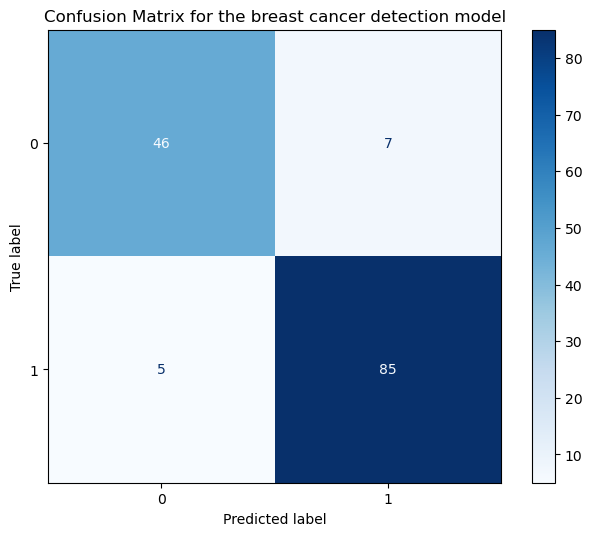

In [14]:
# We import the libraries needed
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# We plot the confusion matrix
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)
ax.set(title='Confusion Matrix for the breast cancer detection model')
display.plot(ax=ax, cmap= plt.cm.Blues);

## Plotting the confusion matrix using seaborn

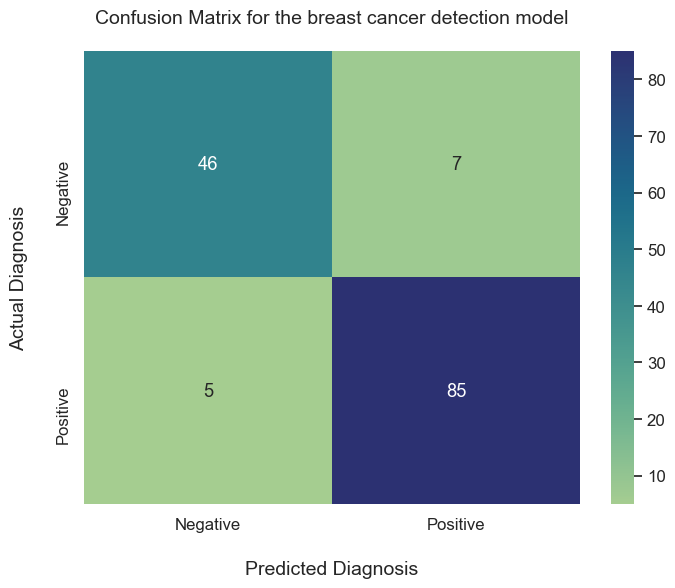

In [15]:
# We import the libraries needed
import seaborn as sns

# We plot the confusion matrix

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)

# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest') 

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label, ticks, and title
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix for the breast cancer detection model", fontsize=14, pad=20)

plt.show()